## Robot Learning

## Assignment 4

#### Group names: Kaywan, Nicolas, Deepak

## Task 15

Recall the proof of the Policy Improvement Theorem presented in the lecture. In this context, briefly explain the equality:

$$E_{\pi'}\{r_{t+1}+ \gamma Q^{\pi}(s_{t+1}, \pi'(s_{t+1}))|s_t = s\}=E_{\pi'}\{r_{t+1}+ \gamma E_{\pi'}\{r_{t+2}+\gamma V^{\pi}(s_{t+2})\}|s_t = s\}$$

<div style="text-align: right; font-weight:bold"> 2 Points </div>

First of all, we assume that the action value function, in state s, take something different that our policy tells us, is larger than the expactet value follwing the policy $\pi$.

$$V^{\pi}(s) \leq  Q^{\pi}(s, \pi'(s))$$


This is our expected return, assuming the $\pi'$ was chosen, under the situation s.
 $$=E_{\pi'}\{r_{t+1}+ \gamma V^{\pi}(s_{t+1})|s_t = s\}$$


Which is the expected return in the following up situation because we assume $V^{\pi}(s) \leq  Q^{\pi}(s, \pi'(s))$, 
We can replace $V^{\pi}(s_{t+1})$ with $Q^{\pi}(s_{t+1}, \pi'(s_{t+1}))$, 

$$\leq E_{\pi'}\{r_{t+1}+ \gamma Q^{\pi}(s_{t+1}, \pi'(s_{t+1}))|s_t = s\}$$


Now we're just simplifying because we know from the lecture that $Q^{\pi}(s,a)$ $=E_{\pi'}\{r_{t+1} +\gamma V^{\pi}s_{t+1})\|s_{t}=s,a_{t}=a\}$
So the respective action value function $Q^{\pi}(s,a)$ tells us how valuable it is to take the action a in state s here. And the action value function is the respective return, which is the reward we got directly and the reward of all the forecomming steps. All the forecomming steps can be sum up in the state Value of the following up states.

$$=E_{\pi'}\{r_{t+1}+ \gamma E_{\pi'}\{r_{t+2}+\gamma V^{\pi}(s_{t+2})\}|s_t = s\}$$

Now we take some rewards of the expactation, we accumulate our forecoming rewards

$$=E_{\pi'}\{r_{t+1}+ \gamma r_{t+2}+\gamma^2 V^{\pi}(s_{t+2})\|s_t = s\}$$


Now we take it out

$$\leq E_{\pi'}\{r_{t+1}+ \gamma r_{t+2}, \gamma^2 r_{t+3}, \gamma^3 V^{\pi}(s_{t+3}|s_t = s\}$$



$$...$$

If we continue this steps to the infinity, we end up with the state value function being in the Situation s of the new policy $\pi'$

$$\leq E_{\pi'}\{r_{t+1}+ \gamma r_{t+2}, \gamma^2 r_{t+3}, \gamma^3 r_{t+4} + .....|s_t = s\}$$




$$=V^{\pi'}(s)$$

## Task 16

Compare Monte Carlo and Temporal Difference policy evaluation. Give at least two advantages of one over the other.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

**Temporal Difference policy evaluation**

$*$Monte Carlo policy evaluations can suffer from a high viariance. One advantage of Temporal difference poilcy is that there is not this kind of problem.

$*$Temporal Difference policy evaluation exploits the markov property, what Monte Carlo policy evaluation does not.


$*$In practice, Temporal Difference policy evaluation is faster






**Monte Carlo policy evaluation**

$*$ Monte Carlo policy evaluation is unbiased. Because of the initial states, Temporal Difference policy evaluation is biased.   


$*$ Monte Carlo policy evaluation is not very sensitive to initial value, Temporal Difference policy evaluation is sensitive to the initial value.


$*$ Temporal Difference policy evaluation learn by bootstrapping. Monte Carlo policy evaluation does not bootstrap

## Task 17

In the table below, indicate whether the attribute in the column is descriptive of the algorithm in the row.

|                                       | Evaluation Method | Control Method |    Samples | Bootstraps |
|:-------------------------------------:|:-----------------:|:--------------:|:----------:|:----------:|
|Iterative Policy Evaluation            |$\checkmark$       |$\times$        |$\times$    |$\checkmark$|
|Monte Carlo Policy Evaluation          |$\checkmark$       |$\times$        |$\checkmark$|$\times$    |
|Temporal Difference Policy Evaluation  |$\checkmark$       |$\times$        |$\checkmark$|$\checkmark$|
|Value Iteration                        |$\checkmark$       |$\checkmark$    |$\times$    |$\checkmark$|
|Policy Iteration                       |$\checkmark$       |$\checkmark$    |$\times$    |$\checkmark$|
|SARSA                                  |$\checkmark$       |$\checkmark$    |$\checkmark$|$\times$    |
|Q-Learning                             |$\checkmark$       |$\checkmark$    |$\checkmark$|$\checkmark$|

<div style="text-align: right; font-weight:bold"> 6 Points </div>

### Task 18

Consider the following $18 \times 14$ grid world, which represents a section of a racetrack with a sharp right turn after a lane narrow.

<img src="helpers/racetrack.png" alt="Grid World" title="Grid World" width="650"/>

The agent enters the section on one of the blue cells at the bottom. Its initial velocity is one cell per time step into the upward direction.

Actions are to increase or decrease its velocity components by one or to leave it unchanged. To clarify, the actions are not to set a velocity, but to accelerate or decelerate. The velocity is thus part of the agent's state, the available actions are accelerations within the physical limitations of the vehicle that the agent is driving.

Both velocity components are restricted to be nonnegative and their sum must be at least 1 and cannot exceed 5. This constrains the available actions based on the agent's current velocity.

The rewards are −1 for each step that the agent stays on the track, which is colored green. The reward is −10 if the agent drives into the crash barriers marked in red. 

The episode ends when the agent crashes or when it succesfully exits the section by driving onto the blue line at the top-right of the grid.

You are given some information for this environment. Please find it in the data structures below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

racetrack = -10. * np.ones((18,14))

circuit =   [(1,x) for x in np.arange(5,13)] + \
            [(2,x) for x in np.arange(4,13)] + \
            [(3,x) for x in np.arange(3,13)] + \
            [(4,x) for x in np.arange(3,13)] + \
            [(5,x) for x in np.arange(3,13)] + \
            [(6,x) for x in np.arange(3,11)] + \
            [(7,x) for x in np.arange(3,9)] + \
            [(8,x) for x in np.arange(3,8)] + \
            [(9,x) for x in np.arange(3,8)] + \
            [(10,x) for x in np.arange(3,8)] + \
            [(11,x) for x in np.arange(4,8)] + \
            [(12,x) for x in np.arange(4,8)] + \
            [(13,x) for x in np.arange(4,7)] + \
            [(14,x) for x in np.arange(4,7)] + \
            [(15,x) for x in np.arange(2,7)] + \
            [(16,x) for x in np.arange(2,7)]
            

for cell in circuit:
    racetrack[cell] = -1.

finishLine = [(y,13) for y in np.arange(1,6)]

for cell in finishLine:
    racetrack[cell] = 0.

startingGrid = [(17,x) for x in np.arange(2,7)]

for cell in startingGrid:
    racetrack[cell] = -1.

Also, please familiarize yourself with the provided racetrack environment class and helper functions by examining the example episode below, which is played by an agent that makes random decisions at each time step.

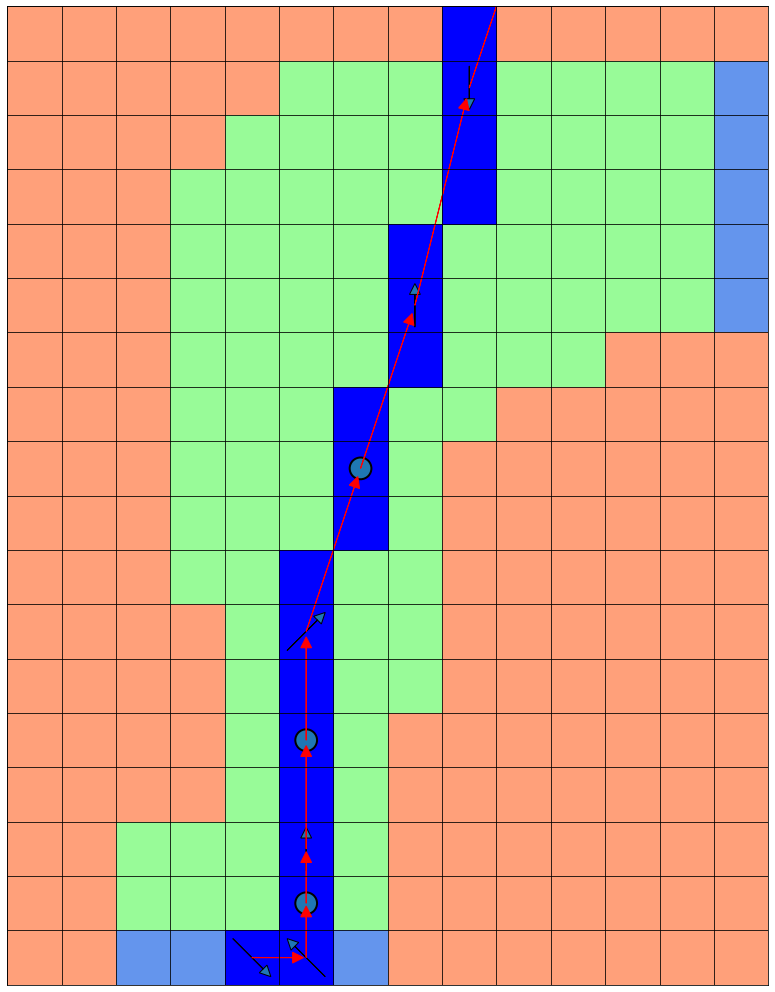

In [2]:
# get the required helper class and visualization function
from helpers.utils import env, drawTrajectory

# this makes sure that our description of the episode visualization makes sense
np.random.seed(321)

# create a racing environment
racer = env()
# reset the agent to one of the 4 starting cells at random
# do this before each new episode
racer.reset()
# you can also manually set the agent position if you want to examine its behaviour there
#racer.setPosition(17,6)
# create flag tracking whether the episode is over
done = False

# create lists to save the trajectory and the decisions of the agent
actions = []
moves = []
velocities = []

# these methods do what you would expect
# v is an integer in [0, 35] representing a velocity
# y, x are both integers, together, they represent the agents location
v = racer.getVelocity()
y, x = racer.getPosition()

# simulate until the episode is over
while not done:
    # which actions are possible at the current velocity?
    # the actions are integers in [0,8]
    possibleActions = racer.getAvailableActions()
    # select one of them randomly
    a = np.random.choice(possibleActions)
    # save the action
    actions.append(a)
    # execute the action using the step function
    # y, x, v are new positions and velocities
    # done is the flag whether the episode is over
    # travel details exactly which cells the agent traveled through
    y, x, v, r, done, travel = racer.step(action = a)
    # save the velocities
    velocities.append(v)
    # save the cells that the agent most recently passed through
    # they are only needed for visualization
    moves.append(travel)

# use the helper function to display how the episode went
drawTrajectory(moves, actions, velocities)

As an output to the cell above, you get a visualization of the agent's path through the race track section. You can see several cells marked in dark blue. These are the grid cells that the agent passed through. Between two time steps, they are calculated by a line drawing algorithm given the current position and velocity of the agent, as well as the acceleration it selected. This acceleration is represented by the arrows with the blue tips. In some cases, a cell will instead contain a circle. This represents the action of no acceleration or deceleration at all, which means that the velocity stays the same as in the previous time step. The red arrows show the velocity of the agent at a certain step after the acceleration the agent selected is added to it. For example, at the very start, the agent has the initial velocity of one cell per step towards the top of the grid. However, it chooses to decelerate in y direction and accelerate towards the right. Thus, the resulting velocity, represented by the first red arrow, points towards the right. Unfortunately, the agent in this episode did not slow down on time and the episode ends in a crash into the barriers at the top of the grid. Note that the visualization is not central to this task, as you are not asked to compute an optimal policy for this environment (yet). However, we feel that it might help you get some intuition for the challenges the agent faces. These should be, to a certain extent, reflected in the state values $V(s)$ that you get.

#### Now to the task: 

Compute  $V(s)$  for each grid cell on the racetrack (obstacle cells do not matter) using either constant-$\alpha$ Temporal Difference *or* constant-$\alpha$ every-visit Monte Carlo (your choice!) Policy Evaluation for  10000  episodes of a policy that uniformly chooses one of the available actions. Use $\alpha=0.2$ and if applicable, $\gamma=0.9$. Print and visualize the resulting state values!

<div style="text-align: right; font-weight:bold"> 8 Points </div>

In [3]:
# Your solution goes here.
#Constant alpha TD 

from helpers.utils import env, drawTrajectory

# this makes sure that our description of the episode visualization makes sense
#np.random.seed(321)
noEpisodes = 10000
alpha = 0.2
gamma = 0.9

V = np.zeros(shape = (18,14,36))
#V[xcoordinate,ycooordinate,velocity]


for episode in range(noEpisodes):
    
    # create a racing environment
    racer = env()
    # reset the agent to one of the 4 starting cells at random
    # do this before each new episode
    racer.reset()
    # you can also manually set the agent position if you want to examine its behaviour there
    #racer.setPosition(17,6)
    # create flag tracking whether the episode is over
    done = False

    # create lists to save the trajectory and the decisions of the agent
    actions = []
    moves = []
    velocities = []

    # these methods do what you would expect
    # v is an integer in [0, 35] representing a velocity
    # y, x are both integers, together, they represent the agents location
    v = racer.getVelocity()
    y, x = racer.getPosition()

    # simulate until the episode is over
    while not done:
        # which actions are possible at the current velocity?
        # the actions are integers in [0,8]
        possibleActions = racer.getAvailableActions()
        # select one of them randomly
        a = np.random.choice(possibleActions)
        # save the action
        actions.append(a)
        # execute the action using the step function
        # y, x, v are new positions and velocities
        # done is the flag whether the episode is over
        # travel details exactly which cells the agent traveled through
        
        y_prime, x_prime, v_prime, r, done, travel = racer.step(action = a)
        
        V[y,x,v] += alpha * (r + gamma*V[y_prime,x_prime,v_prime] - V[y,x,v])
        
        y, x, v = y_prime, x_prime, v_prime
        
        # save the velocities
        velocities.append(v)
        # save the cells that the agent most recently passed through
        # they are only needed for visualization
        moves.append(travel)


In [4]:
V

array([[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]],

       [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [ 0.       , -2.86272  , -2.6592   , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.

In [5]:
#Constant alpha EveryVisit MonteCarlo
from helpers.utils import env, drawTrajectory

# this makes sure that our description of the episode visualization makes sense
#np.random.seed(321)
noEpisodes = 10000
alpha = 0.2
gamma = 0.9

V = np.zeros(shape = (18,14,36))
#V[xcoordinate,ycooordinate,velocity]

for episode in range(noEpisodes):
    
    # create a racing environment
    racer = env()
    # reset the agent to one of the 4 starting cells at random
    # do this before each new episode
    racer.reset()
    # you can also manually set the agent position if you want to examine its behaviour there
    #racer.setPosition(17,6)
    # create flag tracking whether the episode is over
    done = False

    # create lists to save the trajectory and the decisions of the agent
    actions = []
    moves = []
    velocities = []
    
    #create list to save all possible states traversed by agent
    states = []
    rewards = []

    # these methods do what you would expect
    # v is an integer in [0, 35] representing a velocity
    # y, x are both integers, together, they represent the agents location
    v = racer.getVelocity()
    y, x = racer.getPosition()

    # simulate until the episode is over
    while not done:
        
        states.append((y,x,v))
        
        # which actions are possible at the current velocity?
        # the actions are integers in [0,8]
        possibleActions = racer.getAvailableActions()
        # select one of them randomly
        a = np.random.choice(possibleActions)
        # save the action
        actions.append(a)
        # execute the action using the step function
        # y, x, v are new positions and velocities
        # done is the flag whether the episode is over
        # travel details exactly which cells the agent traveled through
        y, x, v, r, done, travel = racer.step(action = a)
        # save the velocities
        velocities.append(v)
        rewards.append(r)
        # save the cells that the agent most recently passed through
        # they are only needed for visualization
        moves.append(travel)
    
    rewards = np.array(rewards)
    cumulativeRewards = np.cumsum(rewards)
    
    #find the rewards obtained from that state onwards
    stateRewards = np.flip(cumulativeRewards)
    
    #add to each state in the episode the rewards obtained from that state onwards
    for i in range(len(stateRewards)):
        
        V[states[i]] += alpha*( stateRewards[i] - V[states[i]] )
   

In [6]:
V

array([[[ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,
          0.     ],
        [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,
          0.     ],
        [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,
          0.     ],
        ...,
        [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,
          0.     ],
        [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,
          0.     ],
        [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,
          0.     ]],

       [[ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,
          0.     ],
        [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,
          0.     ],
        [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,
          0.     ],
        ...,
        [ 0.     , -0.2    , -0.488  , ...,  0.     ,  0.     ,
          0.     ],
        [ 0.     , -0.2    , -0.488  , ...,  0.     ,  0.     ,
          0.     ],
        [ 0.     ,  0.     ,  0.     , ...,  0. 